# Support Vector Regression (SVR)

## Importing the libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [14]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values     #it takes all the columns but Labels are useless so you just take the column of the 2nd index of index 1
y = dataset.iloc[:, -1].values      #Taking ONLY the last column of the data 

In [15]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [16]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**Transform and Reshape into a 2D array. Horizontal List into a vertical array** 

In [17]:
#because fit_transform for Feature Scaling needs 2D array
y = y.reshape(len(y), 1) #(no of row, no of columns)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [18]:
#DO we have to apply feature scaling to the dependant variable (Salary)? Yes 
# We don't want the smaller values to be neglected by the SVR Model
# Don't use Feature scaling for the following Situations
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [19]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [20]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')   #Kernels - Linear or Non-Linear Gaussian RBF Kernel, 
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [22]:
# Because X was scaled by sc_x and Y was scaled by sc_y, need to be on the same scale. Apply the scaling to the particular value
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
#the answer will return the value on the scale that was applied to Y. Reverse the scaling of the Y. Need to do Inverse Transform

array([170370.0204065])

## Visualising the SVR results

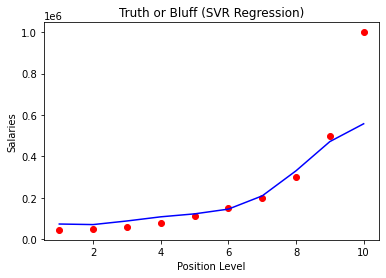

In [32]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue') # Need to take note of the scaling
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

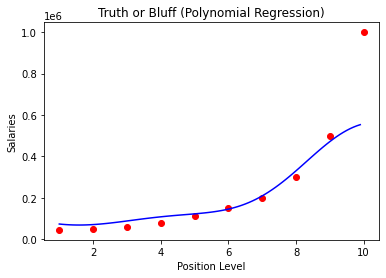

In [39]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue') # Transformed matrix of features sucha s polyreg.fit_tramsofrm(X)
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salaries')
plt.show()